# Part 1: NY Taxi Fare Prediction

In [167]:
# !?pip install -q kaggle

In [168]:
# from google.colab import files
# files.upload()

In [169]:
# !mkdir ~/.Paggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [170]:
# !kaggle competitions download -c new-york-city-taxi-fare-prediction 

In [171]:
# !unzip new-york-city-taxi-fare-prediction

In [172]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [173]:
train = pd.read_csv("content/train.csv", nrows = 1000000)
test = pd.read_csv("content/test.csv")

In [174]:
train.head()

key  fare_amount          pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5  2009-06-15 17:26:21 UTC   
1    2010-01-05 16:52:16.0000002         16.9  2010-01-05 16:52:16 UTC   
2   2011-08-18 00:35:00.00000049          5.7  2011-08-18 00:35:00 UTC   
3    2012-04-21 04:30:42.0000001          7.7  2012-04-21 04:30:42 UTC   
4  2010-03-09 07:51:00.000000135          5.3  2010-03-09 07:51:00 UTC   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  
0                1  
1                1  
2                2  
3                1  
4                1

**Added haversine_distance column because i have to data cleaning on the basis of distance per kilometer**

In [175]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [176]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183941
9912     8.343486
9913     1.180825
Length: 9914, dtype: float64

PART 1 --> train CLEANSING 

Will perform the following activities
1.   Shape of train and test sets
2.   Check for NaNs and drop them (if any)
3.   Check for outliers and drop them (if any)
4.   Type conversion of relevant fields





**Droping column whose passenger count are less then zero**

In [177]:
# index=[]
# for i in train:
#     index.append(i)

In [178]:
train=train[train['passenger_count']>=0]

In [179]:
# Check no of rows & columns in the dataset
print("Shape of the Training data :", train.shape)

# See all the columns in the dataset
print("All columns are :", list(train.columns))

Shape of the Training data : (1000000, 9)
All columns are : ['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'H_Distance']


In [180]:
# Check datatypes & count of not-null values in each field
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1000000 non-null  object 
 1   fare_amount        1000000 non-null  float64
 2   pickup_datetime    1000000 non-null  object 
 3   pickup_longitude   1000000 non-null  float64
 4   pickup_latitude    1000000 non-null  float64
 5   dropoff_longitude  999990 non-null   float64
 6   dropoff_latitude   999990 non-null   float64
 7   passenger_count    1000000 non-null  int64  
 8   H_Distance         999990 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 76.3+ MB


**Checking for null values in test and training data**

In [181]:
#check for missing values in train data
#missing_value=["N/a","na",np.nan]
#train = train.read_csv("content/train.csv",na_values=missing_value)
train.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
H_Distance           10
dtype: int64

In [182]:
# check for missing value in test data
test.isnull().sum(axis=0)

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
H_Distance           0
dtype: int64

In [183]:
#drop the missing values
#train = train["fare_amount"]>=0
train = train.dropna()

In [184]:
# check target value
train["fare_amount"]
len(train)

999990

In [185]:
train.isnull().sum(axis=0)

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
H_Distance           0
dtype: int64

In [186]:
train.head()

key  fare_amount          pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5  2009-06-15 17:26:21 UTC   
1    2010-01-05 16:52:16.0000002         16.9  2010-01-05 16:52:16 UTC   
2   2011-08-18 00:35:00.00000049          5.7  2011-08-18 00:35:00 UTC   
3    2012-04-21 04:30:42.0000001          7.7  2012-04-21 04:30:42 UTC   
4  2010-03-09 07:51:00.000000135          5.3  2010-03-09 07:51:00 UTC   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  H_Distance  
0                1    1.030764  
1                1    8.450134  
2                2    1.389525  
3                1    2.799270  
4                1    1.999157

**Checking the fare_amount_criteria**

In [187]:
#Look for no. of non-positive fare_amount values.
(train["fare_amount"]<=0).sum()

67

In [188]:
# Remove the non-positive fare_amount values.
train = train[train["fare_amount"]>0]


In [189]:
(train["fare_amount"]<=0).sum()

0

**Below this i was calculating manhattan_distance but further it's graph with fare amount per passanger was wrong**


In [190]:
# l1, l2 = abs(train["pickup_longitude"] - train["dropoff_longitude"]), abs(train["pickup_latitude"] - train["dropoff_latitude"])
# manhattan_dist = l1 + l2

**Added a column name fare_by_H_distance for removing outliners**<br>
**Rupess Per Kilometer**

In [191]:
fare_by_H_distance=[]
fare_by_H_distance = train["fare_amount"]/train['H_Distance']
train['fare_by_H_distance']=fare_by_H_distance
# len(train)

**Added a column name effective_dist_by_fare which is fare per (distance*passenger  for removing outliners**

In [192]:
effective_dist_by_fare =  train["fare_amount"]/(train['H_Distance'] * train["passenger_count"])
len(effective_dist_by_fare)
train['effective_dist_by_fare']=effective_dist_by_fare

## Removing Outliers

**Criteria was that.....Before this drop, we have some inf and NA value after repeating multiple time came to this conclusion**

In [193]:
train = train[train['effective_dist_by_fare']>=.2]
train = train[train['effective_dist_by_fare']<=7]

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='effective_dist_by_fare'>

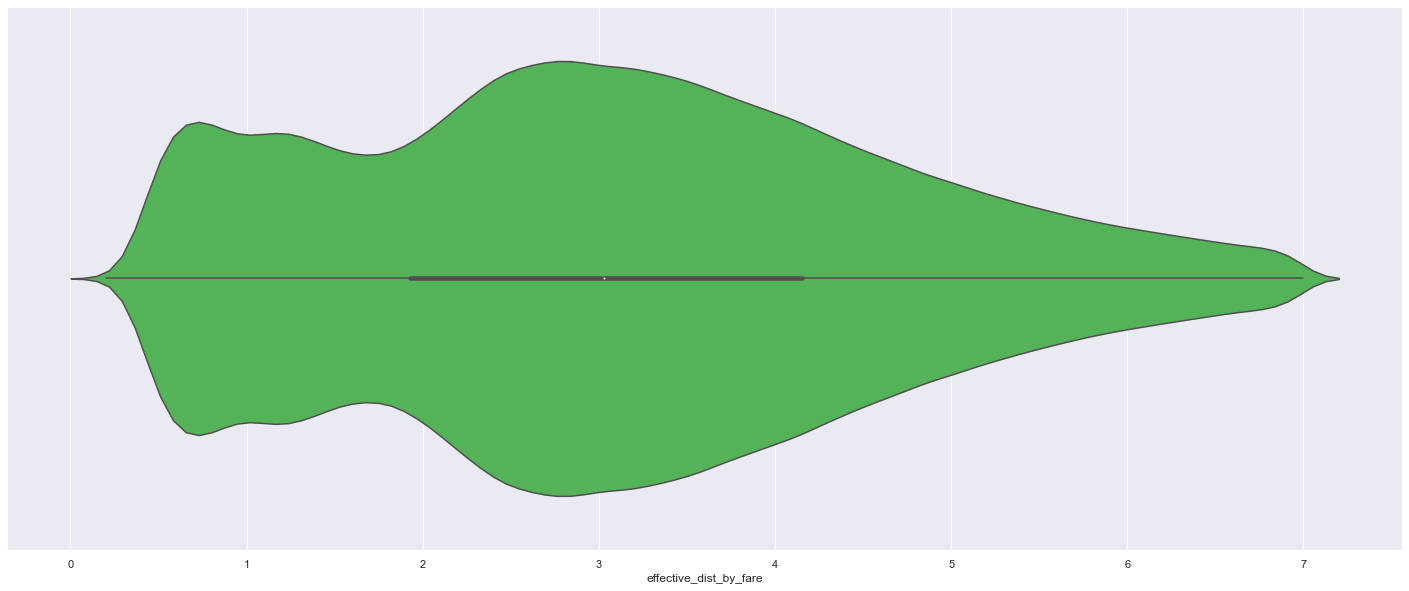

In [194]:
plt.figure(figsize=(25,10))
sns.violinplot(train["effective_dist_by_fare"], color='#44C34A')

In [195]:
len(train)

900721

In [196]:
train.describe().columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'H_Distance', 'fare_by_H_distance', 'effective_dist_by_fare'],
      dtype='object')

### DATA VISUALISATION

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='passenger_count', ylabel='fare_amount'>

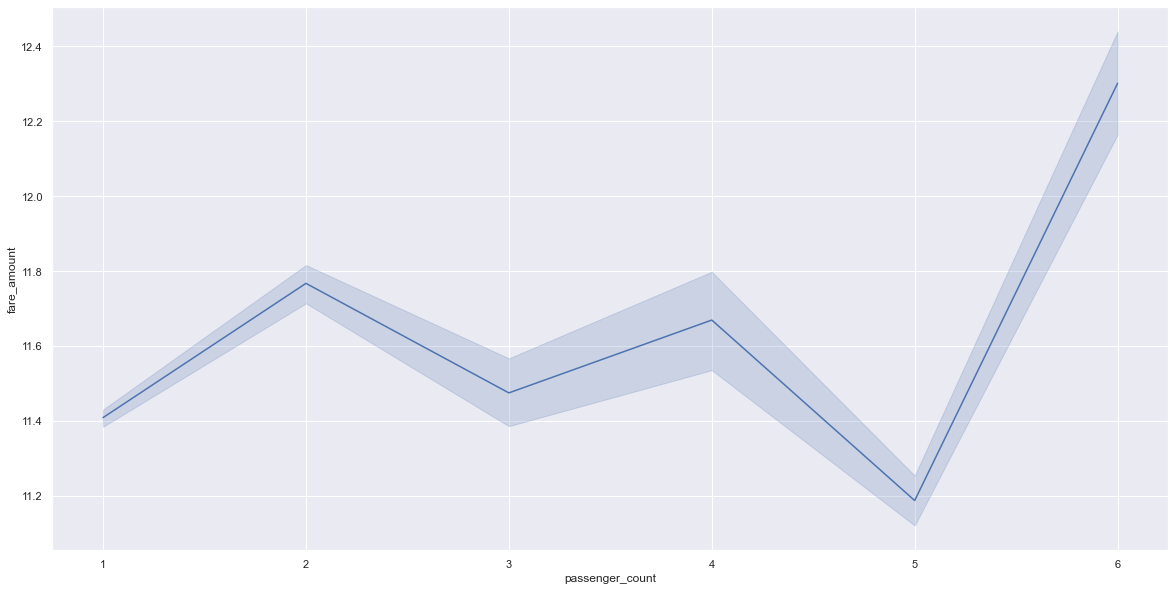

In [197]:
sns.lineplot( train['passenger_count'], train['fare_amount'],data=train)

<AxesSubplot:xlabel='fare_amount', ylabel='H_Distance'>

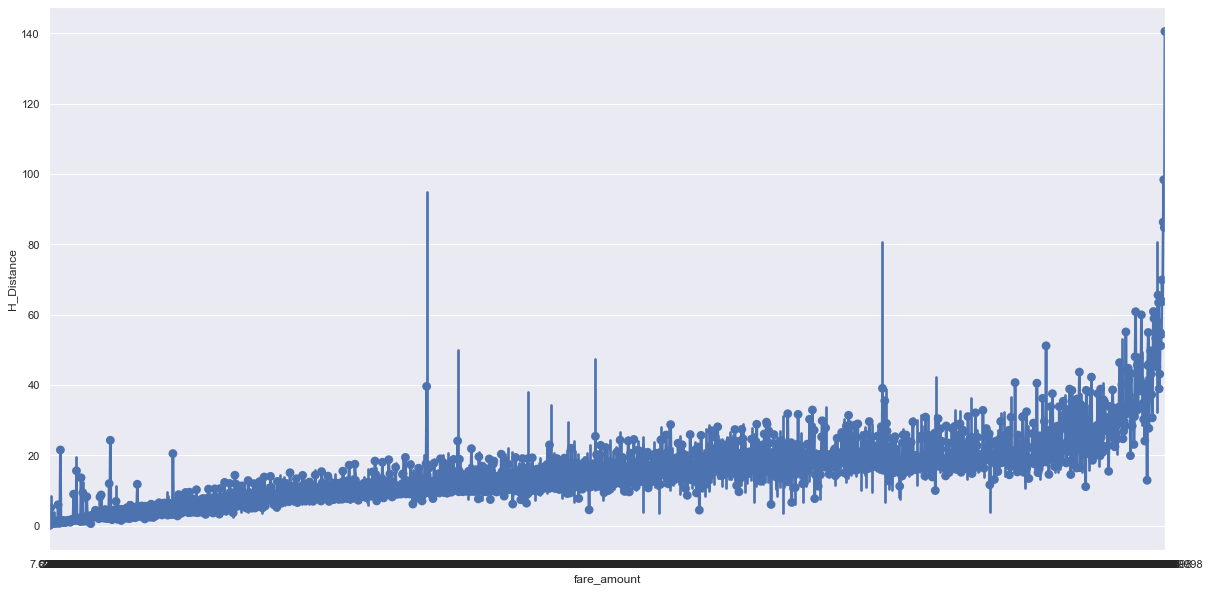

In [198]:
sns.pointplot(x = train["fare_amount"], y = train["H_Distance"], data = train)

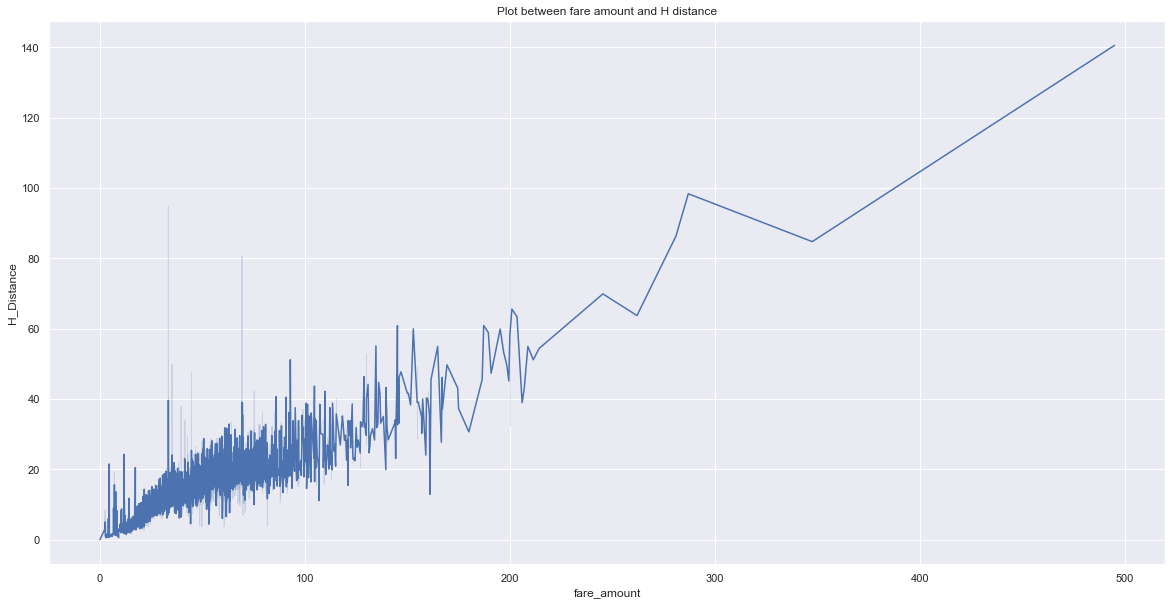

In [199]:
sns.lineplot(x="fare_amount", y="H_Distance", data=train) 
plt.title('Plot between fare amount and H distance')
plt.show()

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='fare_by_H_distance', ylabel='passenger_count'>

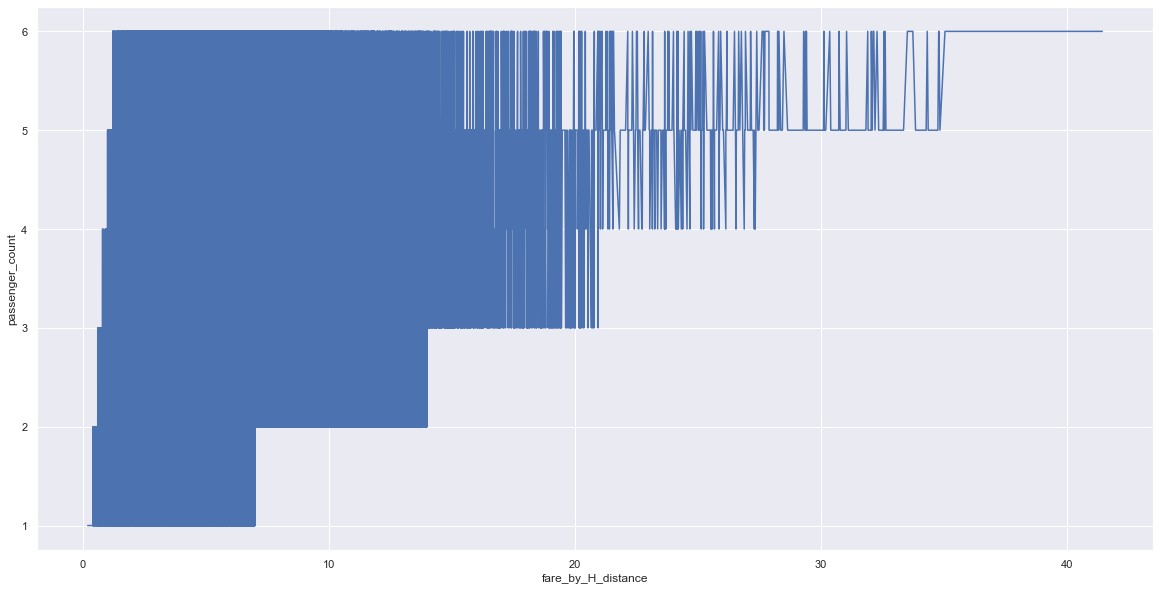

In [200]:
sns.lineplot(train['fare_by_H_distance'],train['passenger_count'])

In [78]:
# sns.lineplot(train['fare_amount'],train['pass'])

<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

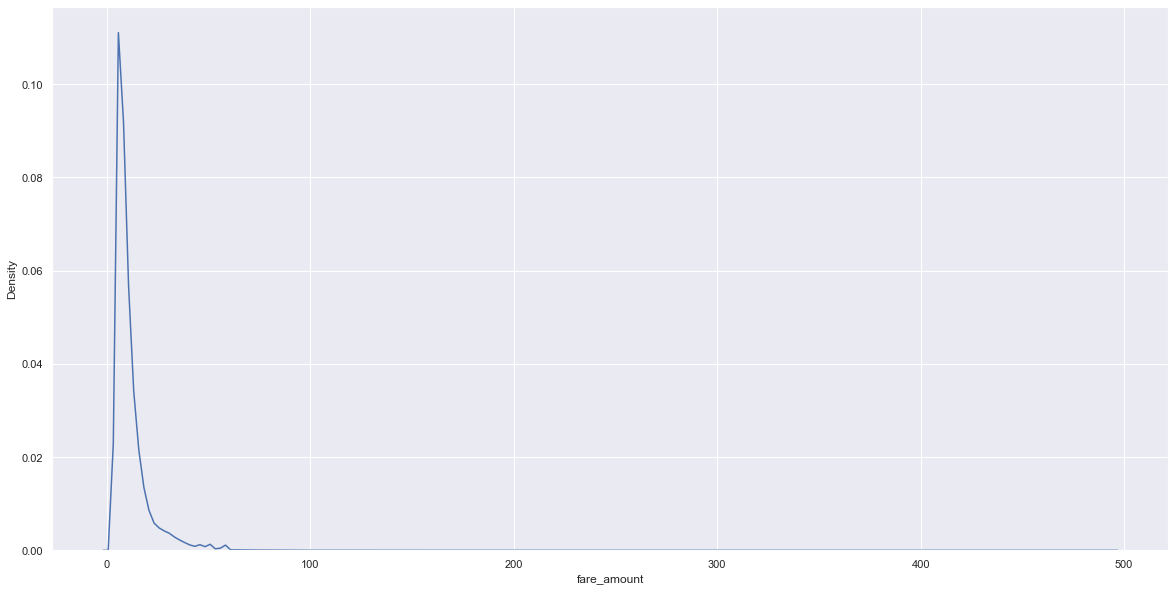

In [79]:
sns.kdeplot(train["fare_amount"])

**Next let us explore the pickup latitude and longitudes**, 

Googling gave me this info
*   Latitudes range from -90 to 90.
*   Longitudes range from -180 to 180.

The above describe clearly shows some outliers. Let's filter them


Check the data types of each column

In [80]:
train.dtypes

key                        object
fare_amount               float64
pickup_datetime            object
pickup_longitude          float64
pickup_latitude           float64
dropoff_longitude         float64
dropoff_latitude          float64
passenger_count             int64
H_Distance                float64
fare_by_H_distance        float64
effective_dist_by_fare    float64
dtype: object

key and pickup_datetime seem to be datetime columns which are in object format. Let's convert them to datetime

In [81]:
train['key'] = pd.to_datetime(train['key'])
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'])

In [82]:
#Convert for test data
test['key'] = pd.to_datetime(test['key'])
test['pickup_datetime']  = pd.to_datetime(test['pickup_datetime'])

In [83]:
#check the dtypes after conversion
train.dtypes

key                            datetime64[ns]
fare_amount                           float64
pickup_datetime           datetime64[ns, UTC]
pickup_longitude                      float64
pickup_latitude                       float64
dropoff_longitude                     float64
dropoff_latitude                      float64
passenger_count                         int64
H_Distance                            float64
fare_by_H_distance                    float64
effective_dist_by_fare                float64
dtype: object

Now, for **EDA**. The following are my considerations - 
1. Does the number of passengers affect the fare? 
2. Does the date and time of pickup affect the fare?
3. Does the day of the week affect the fare?
4. Does the distance travelled affect the fare?

First, let's split the datetime field 'pickup_datetime' to the following - 
* year
* month
* date
* hour
* day of week

Using these we shall calculate the day of the week and come to our conclusions about how pickup_location affects the fare.
Also, create a new field 'distance' to fetch the distance between the pickup and the drop.

We can calulate the distance in a sphere when latitudes and longitudes are given by [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula)

**haversine(θ) = sin²(θ/2)**

Eventually, the formual boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

**a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)**

**c = 2 * atan2( √a, √(1−a) )**

**d = R ⋅ c**

**d = Haversine distance**

*Refer [this](https://community.esri.com/groups/coordinate-reference-systems/blog/2017/10/05/haversine-formula) page for more info and examples on Haversine formula*

Is this distance equal to the road travel distance? Do we have to do something else?


In [84]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        R = 6371  #radius of earth in kilometers
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [85]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183941
9912     8.343486
9913     1.180825
Length: 9914, dtype: float64

haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

Now that we have calculated the distance, we shall create columns for the following -


*   year
*   month
*   date
*   hour
*   day of week






In [86]:
data = [train,test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

<center><B>Correlation</center>

In [87]:
# print(data.corr())

<AxesSubplot:>

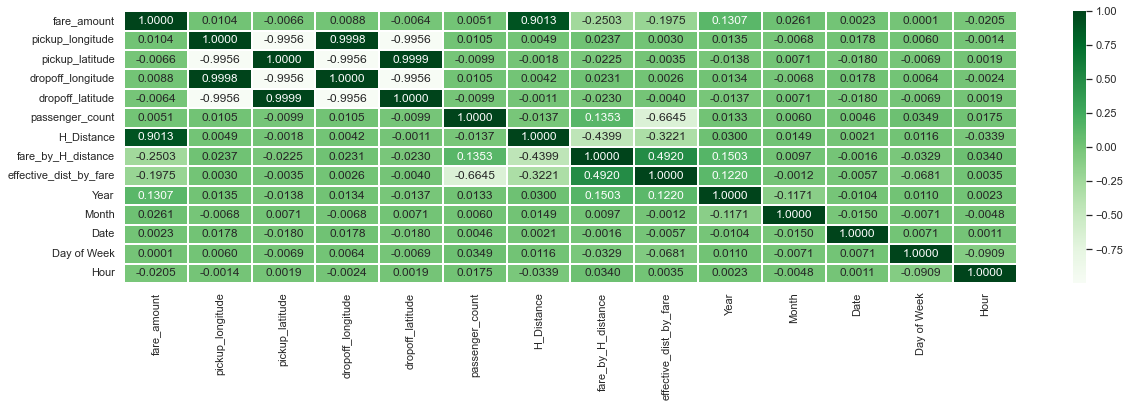

In [88]:
data = pd.DataFrame(train)
fig, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(data.corr(),annot=True,cmap="Greens",fmt='.4f',linewidths=2)

**1. Does the number of passengers affect the fare?**

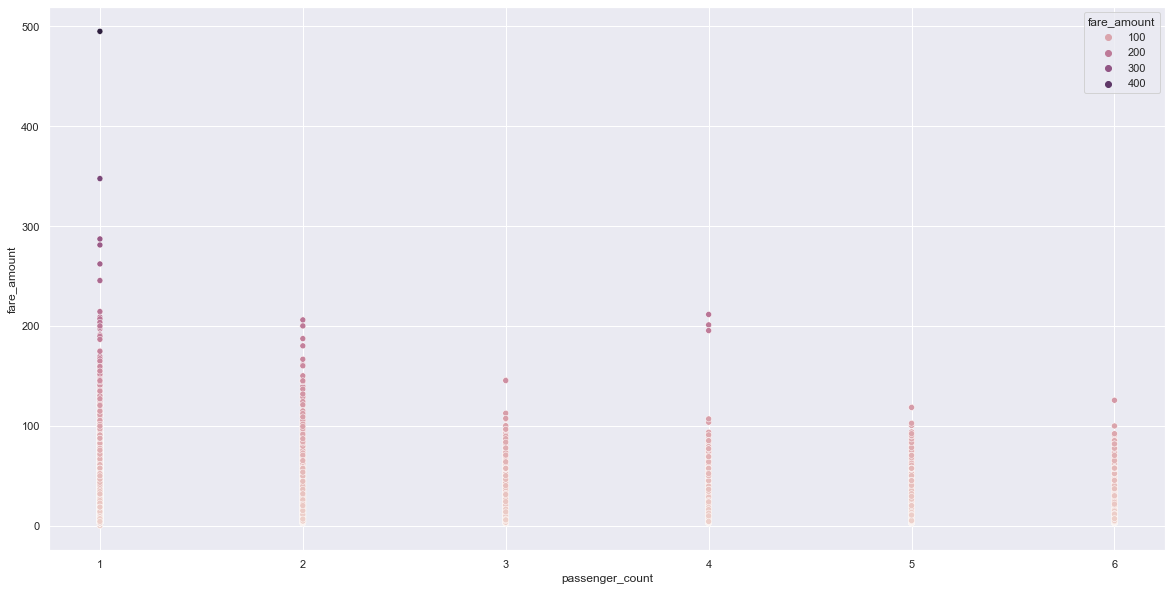

In [89]:
sns.scatterplot(x='passenger_count',y='fare_amount',data=train,hue='fare_amount')
plt.show()

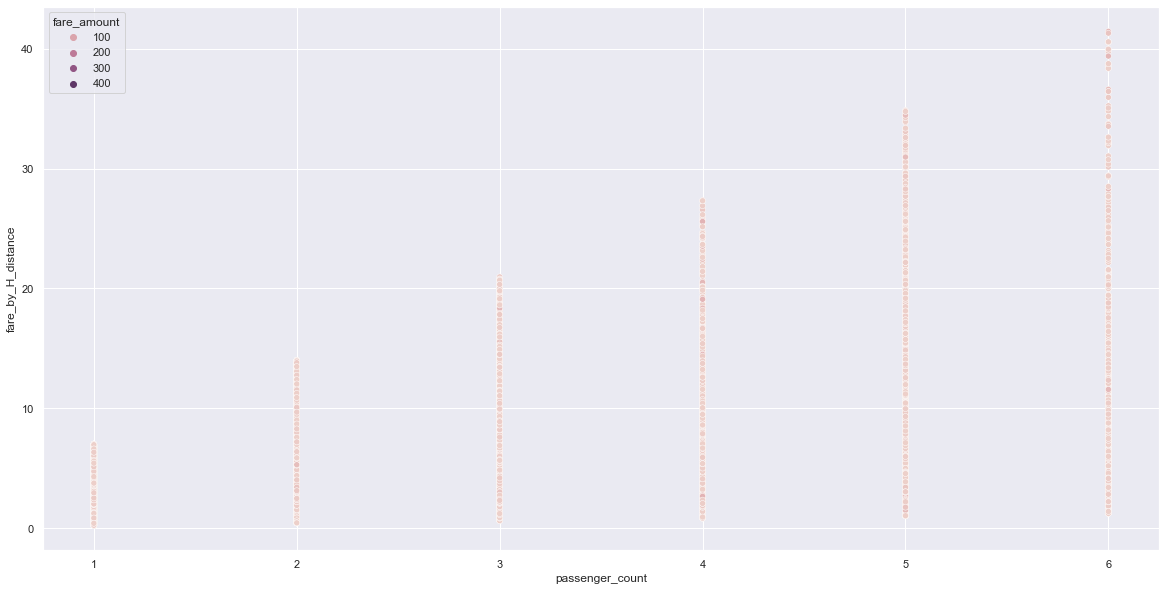

In [90]:
sns.scatterplot(x='passenger_count',y='fare_by_H_distance',data=train,hue='fare_amount')
plt.show()

**2. Does the date and time of pickup affect the fare?**

In [91]:
sns.scatterplot(x='Hour',y='fare_amount',data=train,hue='fare_amount')
plt.show()

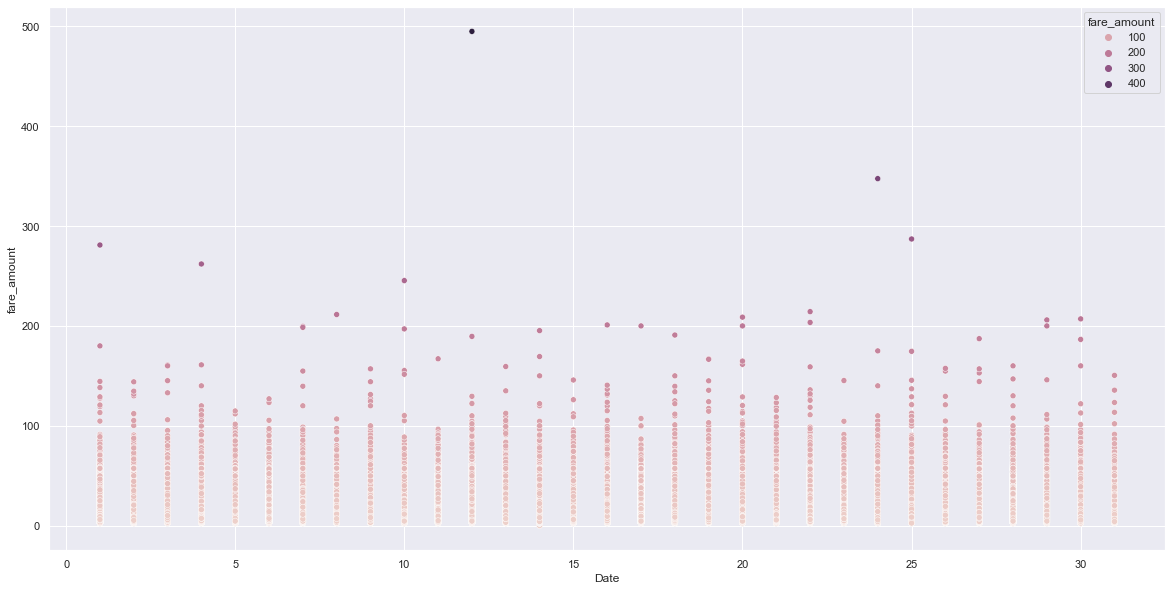

In [92]:
sns.scatterplot(x='Date',y='fare_amount',data=train,hue='fare_amount')
plt.show()

**3. Does the day of the week affect the fare?**

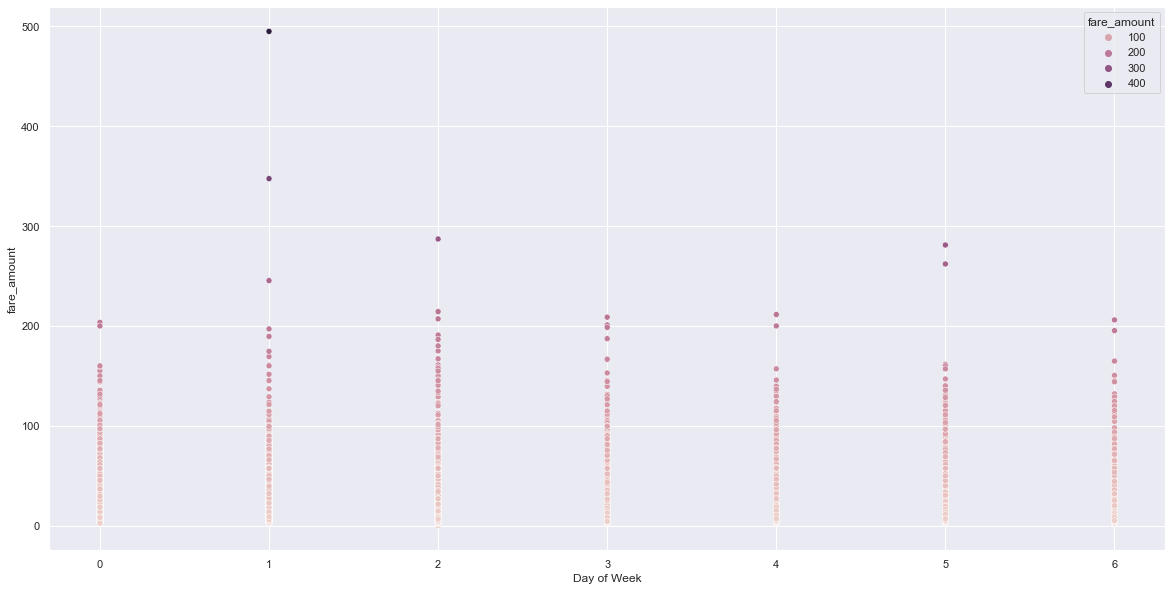

In [93]:
sns.scatterplot(x='Day of Week',y='fare_amount',data=train,hue='fare_amount')
plt.show()

**4. Does the distance affect the fare?**

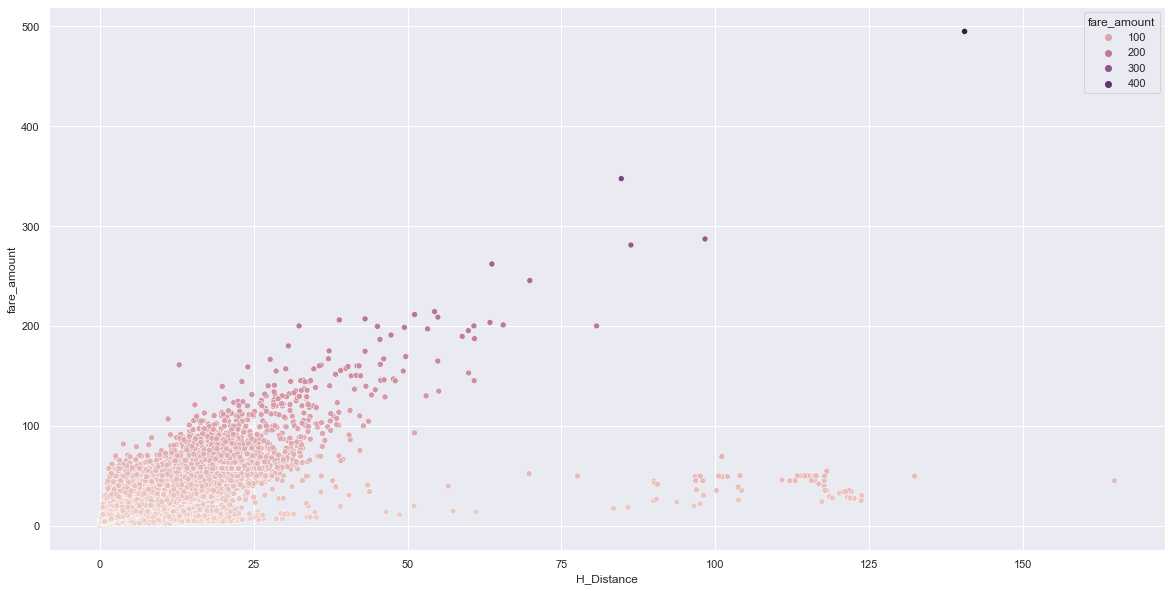

In [94]:
sns.scatterplot(x='H_Distance',y='fare_amount',data=train,hue='fare_amount')
plt.show()

# Part B Scaling and standardization

In [95]:
import sklearn

**Intially i was doing standard Scaling but later some anonymous person said me to use standard library**

**(column-mean_colum)/standard deviation**

In [96]:
t1=train

In [97]:
t1_mean=[]
t1_mean=t1.mean(axis=0)
t1_mean

C:\Users\Dell\AppData\Local\Temp\ipykernel_504\739032266.py:2: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



fare_amount                 11.477332
pickup_longitude           -73.924183
pickup_latitude             40.700741
dropoff_longitude          -73.923091
dropoff_latitude            40.701153
passenger_count              1.732893
H_Distance                   3.541245
fare_by_H_distance           3.989642
effective_dist_by_fare       3.098451
Year                      2011.721712
Month                        6.259220
Date                        15.694081
Day of Week                  3.051276
Hour                        13.522837
dtype: float64

In [98]:
t2_stand=[]
t2_stand=t1.std(axis=0)
t2_stand


key                       675 days 22:09:50.208048344
fare_amount                                  9.479773
pickup_datetime           675 days 22:09:50.208048344
pickup_longitude                             2.404919
pickup_latitude                              2.376643
dropoff_longitude                            2.404957
dropoff_latitude                             2.376602
passenger_count                               1.33484
H_Distance                                   3.754703
fare_by_H_distance                            1.60505
effective_dist_by_fare                       1.555294
Year                                         1.862391
Month                                        3.435017
Date                                         8.687745
Day of Week                                  1.956325
Hour                                         6.567753
dtype: object

### Standard Scaling

In [99]:
from sklearn.preprocessing import StandardScaler
scaler_object = StandardScaler()
scale=train
for i in train:
    # print(i)
    if(i!='key' or i!='pickup_longitude' or i!='pickup_latitude' or i!='dropoff_longitude' or i!='dropoff_latitude'):
        scale[i]=scaler_object.fit_transform(train[[i]])

In [100]:
scale

key  fare_amount  pickup_datetime  pickup_longitude  \
0      -1.483355    -0.736023        -1.483355          0.033212   
1      -1.181581     0.572025        -1.181581         -0.038199   
2      -0.309704    -0.609438        -0.309704         -0.024348   
3       0.055964    -0.398462         0.055964         -0.026174   
4      -1.088931    -0.651633        -1.088931         -0.018259   
...          ...          ...              ...               ...   
999994  1.239189     0.899038         1.239189          0.021316   
999995  1.351552    -0.472304         1.351552         -0.021827   
999997  0.603951    -0.103097         0.603951         -0.022554   
999998 -0.370368    -0.482853        -0.370368         -0.023341   
999999 -1.189124    -0.778219        -1.189124         -0.034285   

        pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0              0.008658           0.033880          0.004681        -0.549050   
1              0.004444          -0.023359          0.034020        -0.549050   
2              0.025468          -0.028338          0.020790         0.200104   
3              0.013634          -0.028473          0.023958        -0.549050   
4              0.028303          -0.013956          0.034759        -0.549050   
...                 ...                ...               ...              ...   
999994         0.030869           0.052628          0.031090         0.200104   
999995         0.035718          -0.015013          0.031121        -0.549050   
999997         0.021204          -0.029234          0.025686         2.447567   
999998         0.024716          -0.022346          0.017659        -0.549050   
999999         0.017191          -0.031751          0.018745        -0.549050   

        H_Distance  fare_by_H_distance  effective_dist_by_fare      Year  \
0        -0.668623            0.234293                0.814794 -1.461408   
1         1.307398           -1.239634               -0.706287 -0.924464   
2        -0.573074            0.070078               -0.673436 -0.387519   
3        -0.197612           -0.771892               -0.223581  0.149425   
4        -0.410709           -0.833946               -0.287620 -0.924464   
...            ...                 ...                     ...       ...   
999994    0.770376           -0.548922               -0.992838  1.223314   
999995   -0.442507           -0.165582                0.402125  1.223314   
999997   -0.473940            1.227609               -1.225781  0.686370   
999998   -0.452383           -0.152707                0.415413 -0.387519   
999999   -0.741256            0.884062                1.485349 -1.461408   

           Month      Date  Day of Week      Hour  
0      -0.075464 -0.079892    -1.559699  0.529430  
1      -1.531062 -1.230939    -1.048536  0.377171  
2       0.506775  0.265422    -0.026210 -2.058976  
3      -0.657703  0.610736     0.996116 -1.449939  
4      -0.948823 -0.770520    -1.048536 -0.993162  
...          ...       ...          ...       ...  
999994 -0.075464  1.531574     1.507279  1.290726  
999995  0.797895 -0.310101     0.996116  1.138467  
999997 -0.657703  1.186260     0.484953  0.072652  
999998  0.215656 -0.885625     0.484953 -2.058976  
999999  1.671253  1.761784    -0.026210  0.072652  

[900721 rows x 16 columns]

# Part C: Pipeline

**Use pipeline changing the column name and scaling and Removing outliers**

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [102]:
class Remove_unnecessary_data:
    def fit(self):
        pass
    def transform(self,df):
        ls = ['fare_amount', 'passenger_count']
        for i in ls:
            df = df[df[i] > 0]
        # in kaggle comment was written that lattitude and longitude should should be appropriate ( )
        df = df[df['pickup_longitude']<=0]
        df = df[df['dropoff_longitude']<=0]
        df = df[df['pickup_latitude']>=0]
        df = df[df['dropoff_latitude']>=0]
        return df
class scalling:
    def fit(self):
        pass
    def transform(self,df):
        print('Abhay')
        scaler_object = StandardScaler()
        scale = df
        scale['fare_amount'] = scaler_object.fit_transform(df[['fare_amount']])
        scale['passenger_count'] = scaler_object.fit_transform(df[['passenger_count']])
        #scale['effective_dist_by_fare'] = scaler_object.fit_transform(df[['effective_dist_by_fare']])
        return scale
class minkowski_distance:
    def fit(self):pass
    def transform(self, df):

        l1, l2 = abs(df["pickup_longitude"] - df["dropoff_longitude"]), abs(train["pickup_latitude"] - df["dropoff_latitude"])
        manhattan_dist = l1 + l2
        effective_fare_by_dist_by_passenger_count = df["fare_amount"] / (manhattan_dist * df["passenger_count"])
        df['effective_fare_by_dist_by_passenger_count'] = effective_fare_by_dist_by_passenger_count
        return df
class change_key:
    def fit(self):
        pass
    def transform(self,df):
        key_li=[]
        for i in range(len(df)):
            key_li.append("Abhay"+"_"+str(i))
        df['key']=key_li
        return df

# l1, l2 = abs(train["pickup_longitude"] - train["dropoff_longitude"]), abs(train["pickup_latitude"] - train["dropoff_latitude"])
# manhattan_dist = l1 + l2  

In [103]:
pipe = Pipeline([
    ('Scalling', scalling()),
    ('Unnecessary', Remove_unnecessary_data()),
    ('man_hatten_distance_added',minkowski_distance()),
    ('Change_key', change_key())
])

In [104]:
train1 = pd.read_csv("content/train.csv",nrows=100)
data = pipe.transform(train1)

Abhay


<AxesSubplot:>

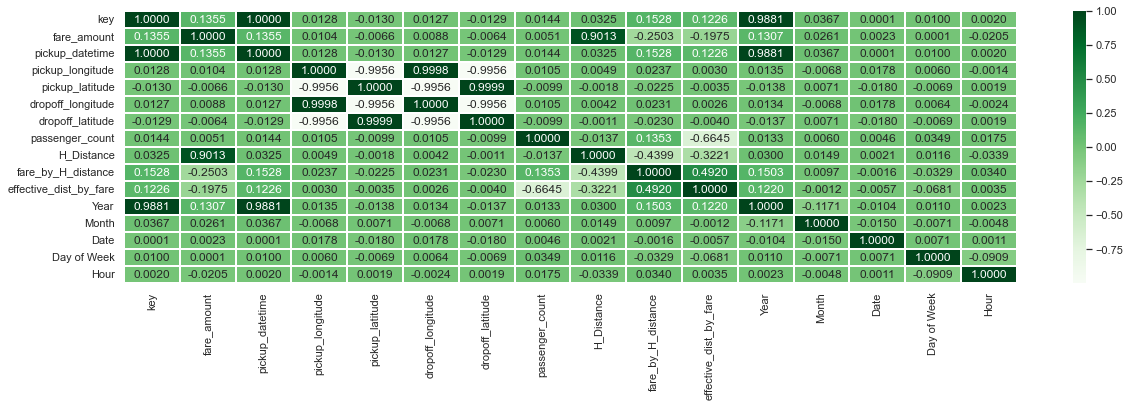

In [105]:
data_p = pd.DataFrame(train)
fig, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(data_p.corr(),annot=True,cmap="Greens",fmt='.4f',linewidths=2)

In [106]:
data

key  fare_amount          pickup_datetime  pickup_longitude  \
32  Abhay_0     2.966598  2009-01-09 16:10:00 UTC        -73.873027   
41  Abhay_1     0.148449  2011-10-15 10:55:24 UTC        -74.003899   
54  Abhay_2     2.107734  2013-11-10 01:12:19 UTC        -73.974497   
58  Abhay_3     0.524203  2012-07-19 23:53:14 UTC        -74.002113   
67  Abhay_4     0.899956  2014-04-29 18:28:00 UTC        -73.970323   
68  Abhay_5     0.228968  2015-04-12 10:19:05 UTC        -73.979279   
73  Abhay_6     0.041091  2012-05-21 15:20:00 UTC        -73.977788   
75  Abhay_7     0.708053  2010-08-16 01:33:00 UTC        -73.961933   
92  Abhay_8     0.161869  2015-04-03 16:21:30 UTC        -73.981056   

    pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
32        40.773883         -73.984545         40.769545         0.970748   
41        40.725514         -73.976484         40.765537         0.218230   
54        40.751603         -73.934927         40.851567         1.723266   
58        40.739582         -73.971918         40.791899         0.218230   
67        40.750840         -73.998392         40.724862         3.228303   
68        40.723438         -74.004608         40.746948         3.228303   
73        40.771838         -73.966200         40.778113         0.218230   
75        40.795585         -73.962253         40.764817         0.218230   
92        40.774265         -73.959045         40.780674         0.218230   

    effective_fare_by_dist_by_passenger_count  
32                                   0.074810  
41                                   0.016680  
54                                   0.029927  
58                                   0.058866  
67                                   0.006844  
68                                   0.001740  
73                                   0.004620  
75                                   0.079669  
92                                   0.018192

# Part D Using K flod Cross validation

In [107]:
import math

In [108]:

temp = 10
Train=train.copy()
df = pd.DataFrame(Train, index = None)
Len_of_fold = len(df.axes[0])//10
answer = temp*temp
while True: 
    pd.concat([Train.iloc[temp*Len_of_fold + Len_of_fold : ],Train.iloc[0:temp*Len_of_fold+1]],axis=0)
    test_data = Train.iloc[temp*Len_of_fold: temp*Len_of_fold + Len_of_fold]
    fare_amount_test = test_data["fare_amount"] 
    weights = np.dot(np.linalg.pinv(Train.iloc[0:temp*Len_of_fold+1]), Train.iloc[0:temp*Len_of_fold+1]["fare_amount"])
    predicted_value = np.dot(test_data, weights)
    MSE = np.square(np.subtract(predicted_value, fare_amount_test)).mean()
    RMSE = math.sqrt(MSE)
    # answer = min(answer, RMSE)
    if(RMSE<answer):
        answer=RMSE
    temp = temp - 1
    if(temp==0):
        break
print("The minimum RMSE value is ", answer)

The minimum RMSE value is  3.280386036421031e-05


# Part E: Linear Regression

In [109]:
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error
from statistics import linear_regression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor

In [110]:
X_cols=['H_Distance', 'Year']
y_col =['fare_amount']
X = train[X_cols].values
y = train[y_col].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# LinearRegression (Matrix Based)

In [111]:
L_R=LinearRegression()
L_R.fit(X_train,y_train)
Linear_test = L_R.predict(X_test)
mean_squared_error(Linear_test,y_test)

0.16887925208922716

In [112]:
L_R.score(X_train,y_train)

0.8187553629188452

In [113]:
L_R.coef_

array([[0.89143211, 0.10382769]])

# SGD (Optimization Based)

In [114]:
sgd=SGDRegressor(max_iter=80,eta0= 0.0000001)
sgd.fit(X_train,y_train)
SGD_Test = sgd.predict(X_test)
mean_squared_error(SGD_Test,y_test)

c:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.9686931979638375

In [115]:
sgd.score(X_train,y_train)

0.0357800806257732

In [116]:
sgd.coef_

array([0.01961428, 0.00285442])

# KNeighborsRegressor (Non-parametric)

In [117]:

neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train,y_train)
KX_test =neigh.predict(X_test)
mean_squared_error(KX_test,y_test)

0.19396610319602048

In [118]:
neigh.score(X_train,y_train)

0.9382389534254966

# Start of Part 2:

### Life Expectancy prediction

In [119]:
import plotly.express as px
import pycountry

### Data Cleaning and Visiualization

In [120]:
train_Health = pd.read_csv("content\Life Expectancy Data.csv")

In [121]:
train_Health.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

**Dropping of NA values**

In [122]:
train_Health=train_Health.dropna()

**Added ISO_CODE column for adding ISO code**

In [123]:

input_countries = train_Health['Country']

countries = {}
for country in pycountry.countries:
   countries[country.name] = country.alpha_3

train_Health['Code_ISO'] = [countries.get(country, 'Unknown code') for country in input_countries]

In [124]:
import plotly.express as px
from time import sleep

for col in train_Health.describe().columns[1:]:
    fig = px.choropleth(train_Health, locationmode='country names', locations="Country",
                        color=col,
                        hover_name="Country",
                        color_continuous_scale=px.colors.sequential.Plasma,
                        title=col)
    fig.show()

In [125]:
# data=pd.DataFrame(train_Health)
# print(data.corr())


<AxesSubplot:>

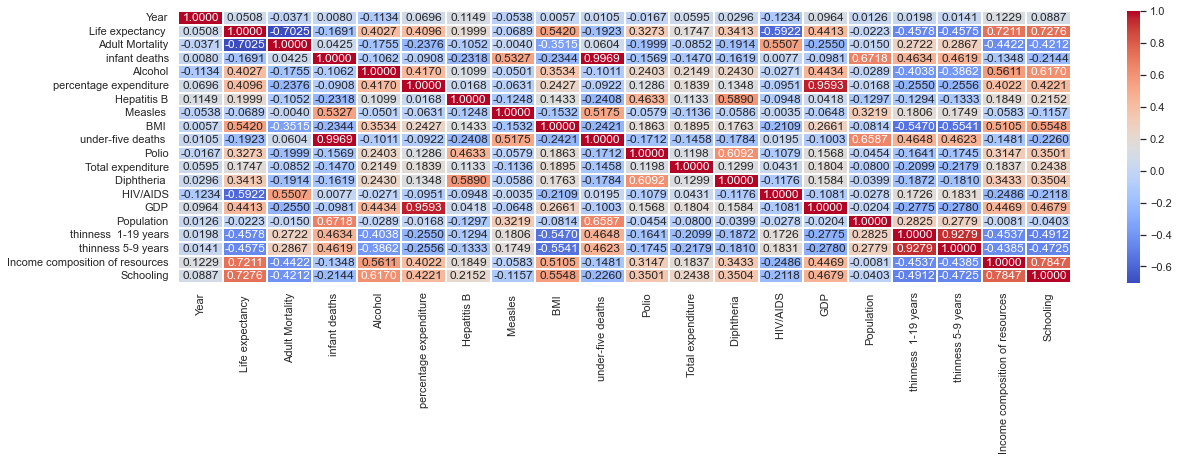

In [126]:
data = pd.DataFrame(train_Health)
fig, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt='.4f',linewidths=2)

In [127]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(train_Health.groupby(['Year','Country']).mean().corr(), annot=True,cmap='coolwarm');

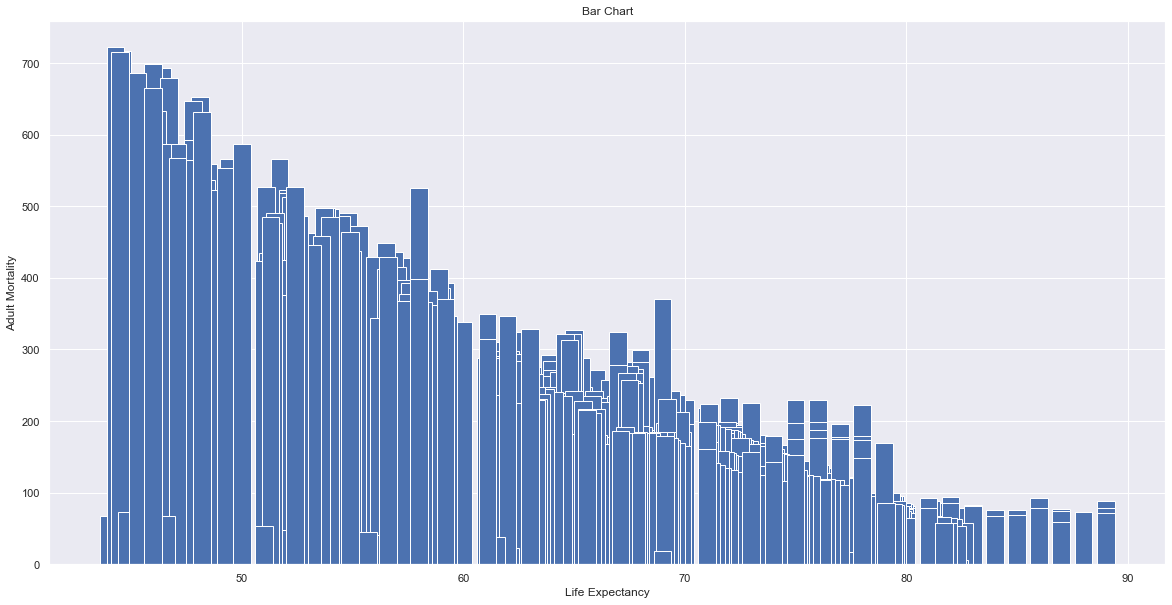

In [128]:
# reading the database
data = train_Health
 
# Bar chart with day against tip
plt.bar(data['Life expectancy '], data['Adult Mortality'])
 
plt.title("Bar Chart")
 
# Setting the X and Y labels
plt.xlabel('Life Expectancy')
plt.ylabel('Adult Mortality')
 
# Adding the legends
plt.show()

In [129]:
train_Health.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  1649.000000       1649.000000      1649.000000    1649.000000   
mean   2007.840509         69.302304       168.215282      32.553062   
std       4.087711          8.796834       125.310417     120.847190   
min    2000.000000         44.000000         1.000000       0.000000   
25%    2005.000000         64.400000        77.000000       1.000000   
50%    2008.000000         71.700000       148.000000       3.000000   
75%    2011.000000         75.000000       227.000000      22.000000   
max    2015.000000         89.000000       723.000000    1600.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  1649.000000             1649.000000  1649.000000    1649.000000   
mean      4.533196              698.973558    79.217708    2224.494239   
std       4.029189             1759.229336    25.604664   10085.802019   
min       0.010000                0.000000     2.000000       0.000000   
25%       0.810000               37.438577    74.000000       0.000000   
50%       3.790000              145.102253    89.000000      15.000000   
75%       7.340000              509.389994    96.000000     373.000000   
max      17.870000            18961.348600    99.000000  131441.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  1649.000000         1649.000000  1649.000000        1649.000000   
mean     38.128623           44.220133    83.564585           5.955925   
std      19.754249          162.897999    22.450557           2.299385   
min       2.000000            0.000000     3.000000           0.740000   
25%      19.500000            1.000000    81.000000           4.410000   
50%      43.700000            4.000000    93.000000           5.840000   
75%      55.800000           29.000000    97.000000           7.470000   
max      77.100000         2100.000000    99.000000          14.390000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  1649.000000  1649.000000    1649.000000  1.649000e+03   
mean     84.155246     1.983869    5566.031887  1.465363e+07   
std      21.579193     6.032360   11475.900117  7.046039e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      82.000000     0.100000     462.149650  1.918970e+05   
50%      92.000000     0.100000    1592.572182  1.419631e+06   
75%      97.000000     0.700000    4718.512910  7.658972e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            1649.000000          1649.000000   
mean                4.850637             4.907762   
std                 4.599228             4.653757   
min                 0.100000             0.100000   
25%                 1.600000             1.700000   
50%                 3.000000             3.200000   
75%                 7.100000             7.100000   
max                27.200000            28.200000   

       Income composition of resources    Schooling  
count                      1649.000000  1649.000000  
mean                          0.631551    12.119891  
std                           0.183089     2.795388  
min                           0.000000     4.200000  
25%                           0.509000    10.300000  
50%                           0.673000    12.300000  
75%                           0.751000    14.000000  
max                           0.936000    20.700000

In [130]:
train_Health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Life expectancy '>

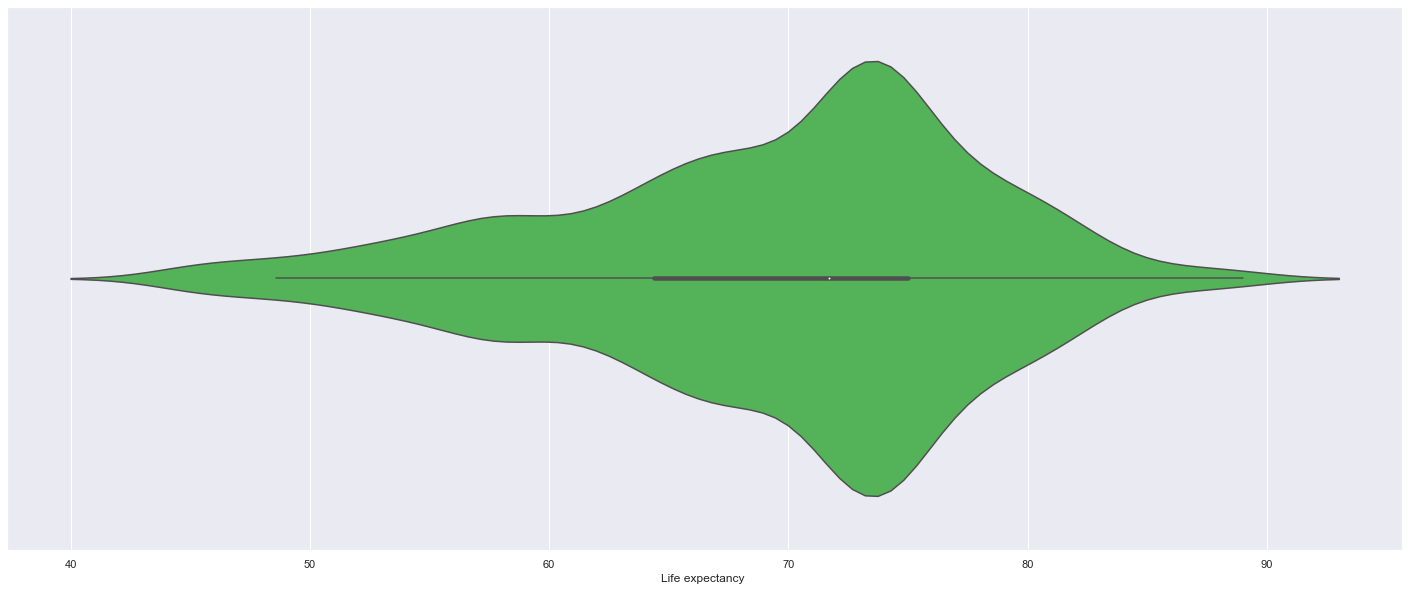

In [131]:
plt.figure(figsize=(25,10))
sns.violinplot(train_Health["Life expectancy "], color='#44C34A')

**Initially i though of removing, on basis of BMI**

In [132]:
len(train_Health)

1649

In [133]:
(train_Health[' BMI ']>60).sum()

174

In [134]:
(train_Health[' BMI ']<15).sum()

218

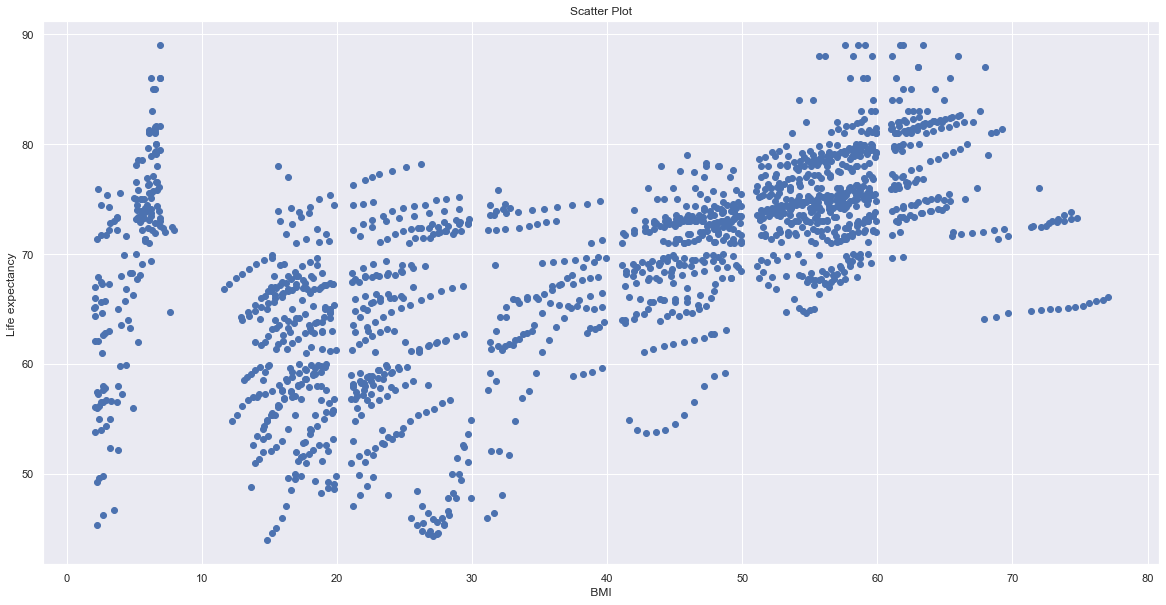

In [135]:
plt.scatter(train_Health[' BMI '], train_Health['Life expectancy '])
 
# Adding Title to the Plot
plt.title("Scatter Plot")
 
# Setting the X and Y labels
plt.xlabel(' BMI ')
plt.ylabel('Life expectancy ')
 
plt.show()

In [136]:
train_Health

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0     ...               8.16         65.0        0.1  584.259210  33736494.0   
1     ...               8.18         62.0        0.1  612.696514    327582.0   
2     ...               8.13         64.0        0.1  631.744976  31731688.0   
3     ...               8.52         67.0        0.1  669.959000   3696958.0   
4     ...               7.87         68.0        0.1   63.537231   2978599.0   
...   ...                ...          ...        ...         ...         ...   
2933  ...               7.13         65.0       33.6  454.366654  12777511.0   
2934  ...               6.52         68.0       36.7  453.351155  12633897.0   
2935  ...               6.53         71.0       39.8   57.348340    125525.0   
2936  ...               6.16         75.0       42.1  548.587312  12366165.0   
2937  ...               7.10         78.0       43.5  547.358878  12222251.0   

       thinness  1-19 years   thinness 5-9 years  \
0                      17.2                 17.3   
1                      17.5                 17.5   
2                      17.7                 17.7   
3                      17.9                 18.0   
4                      18.2                 18.2   
...                     ...                  ...   
2933                    9.4                  9.4   
2934                    9.8                  9.9   
2935                    1.2                  1.3   
2936                    1.6                  1.7   
2937                   11.0                 11.2   

      Income composition of resources  Schooling  Code_ISO  
0                               0.479       10.1       AFG  
1                               0.476       10.0       AFG  
2                               0.470        9.9       AFG  
3                               0.463        9.8       AFG  
4                               0.454        9.5       AFG  
...                               ...        ...       ...  
2933                            0.407        9.2       ZWE  
2934                            0.418        9.5       ZWE  
2935                            0.427

# Part 2 Kolmogorov–Smirnov test

P_value came zero from this test
I think data is too bad to prediction because " P value 0.000 means the null hypothesis is true ", which means the prediction from this model is not possible

In [137]:
from unittest import expectedFailure
from scipy.stats import kstest
li=train_Health.columns
for col in li:
    try:
        x=kstest(train_Health[col],'norm')
        print("kstest results for ",col," are ",x)
    except:
        pass

kstest results for  Year  are  KstestResult(statistic=1.0, pvalue=0.0)
kstest results for  Life expectancy   are  KstestResult(statistic=1.0, pvalue=0.0)
kstest results for  Adult Mortality  are  KstestResult(statistic=0.9901601080326513, pvalue=0.0)
kstest results for  infant deaths  are  KstestResult(statistic=0.6042965630184672, pvalue=0.0)
kstest results for  Alcohol  are  KstestResult(statistic=0.6082125229421258, pvalue=0.0)
kstest results for  percentage expenditure  are  KstestResult(statistic=0.9666001819757895, pvalue=0.0)
kstest results for  Hepatitis B  are  KstestResult(statistic=0.9975426162051044, pvalue=0.0)
kstest results for  Measles   are  KstestResult(statistic=0.5970194253592799, pvalue=0.0)
kstest results for   BMI   are  KstestResult(statistic=0.9816617719089116, pvalue=0.0)
kstest results for  under-five deaths   are  KstestResult(statistic=0.6272756132607806, pvalue=0.0)
kstest results for  Polio  are  KstestResult(statistic=0.9993619006199013, pvalue=0.0)
kste

# Feature Selection

**Used DecisionTreeRegressor, which is giving column rank on basis of life expentency**

In [138]:
array = train_Health.drop(['Country','Status','Code_ISO'],axis=1).copy(deep=True)

In [139]:
X_heal=array.iloc[:,array.columns!='Life expectancy '].values
Y_heal=array[['Life expectancy ']].values

In [140]:
X_heal[0]

array([2.01500000e+03, 2.63000000e+02, 6.20000000e+01, 1.00000000e-02,
       7.12796236e+01, 6.50000000e+01, 1.15400000e+03, 1.91000000e+01,
       8.30000000e+01, 6.00000000e+00, 8.16000000e+00, 6.50000000e+01,
       1.00000000e-01, 5.84259210e+02, 3.37364940e+07, 1.72000000e+01,
       1.73000000e+01, 4.79000000e-01, 1.01000000e+01])

In [141]:
Y_heal

array([[65. ],
       [59.9],
       [59.9],
       ...,
       [44.8],
       [45.3],
       [46. ]])

In [142]:
from sklearn.tree import DecisionTreeRegressor

In [143]:
model = DecisionTreeRegressor()
model.fit(X_heal, Y_heal)
# print("Number of Features: %d")
# print("Selected Features: %s")
# print("Feature Ranking: %s")
model.feature_importances_

array([5.77372618e-03, 1.30860385e-01, 4.85874623e-04, 4.76354036e-03,
       3.11028612e-03, 2.10611780e-03, 3.00406514e-03, 4.55470419e-03,
       2.07302526e-03, 1.47227667e-03, 9.69283754e-03, 1.58078342e-03,
       1.18536678e-01, 8.99509260e-04, 2.45776896e-03, 1.76626804e-02,
       7.18841721e-03, 6.76214593e-01, 7.56273191e-03])

**The above mentioned array shows priority of column on the basis of life expectency**<br>

<ul>
<li>Life Expectency</li>
<li>HIV/AIDS</li>
<li>Total expenditure</li>
<li>thinness 1-19years </li>
</ul>

**Selected column for further calculation**

In [144]:
train_Health=train_Health[['Life expectancy ',' HIV/AIDS',' thinness  1-19 years','Total expenditure']]

In [145]:
train_Health

Life expectancy    HIV/AIDS   thinness  1-19 years  Total expenditure
0                 65.0        0.1                   17.2               8.16
1                 59.9        0.1                   17.5               8.18
2                 59.9        0.1                   17.7               8.13
3                 59.5        0.1                   17.9               8.52
4                 59.2        0.1                   18.2               7.87
...                ...        ...                    ...                ...
2933              44.3       33.6                    9.4               7.13
2934              44.5       36.7                    9.8               6.52
2935              44.8       39.8                    1.2               6.53
2936              45.3       42.1                    1.6               6.16
2937              46.0       43.5                   11.0               7.10

[1649 rows x 4 columns]

# Scaling

In [146]:
from sklearn.preprocessing import StandardScaler
scaler_object = StandardScaler()
for i in train_Health.describe().columns[1:]:
    train_Health[i]=scaler_object.fit_transform(train_Health[[i]])

C:\Users\Dell\AppData\Local\Temp\ipykernel_504\348872726.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Dell\AppData\Local\Temp\ipykernel_504\348872726.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Dell\AppData\Local\Temp\ipykernel_504\348872726.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [147]:
train_Health

Life expectancy    HIV/AIDS   thinness  1-19 years  Total expenditure
0                 65.0  -0.312389               2.685909           0.958840
1                 59.9  -0.312389               2.751157           0.967541
2                 59.9  -0.312389               2.794656           0.945790
3                 59.5  -0.312389               2.838155           1.115452
4                 59.2  -0.312389               2.903403           0.832682
...                ...        ...                    ...                ...
2933              44.3   5.242678               0.989458           0.510759
2934              44.5   5.756729               1.076455           0.245390
2935              44.8   6.270780              -0.793991           0.249740
2936              45.3   6.652173              -0.706993           0.088779
2937              46.0   6.884325               1.337448           0.497708

[1649 rows x 4 columns]

# 

In [148]:
from sklearn.preprocessing import StandardScaler
scaler_object = StandardScaler()
for i in train_Health.describe().columns[1:]:
    train_Health[i]=scaler_object.fit_transform(train_Health[[i]])

C:\Users\Dell\AppData\Local\Temp\ipykernel_504\348872726.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Dell\AppData\Local\Temp\ipykernel_504\348872726.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Dell\AppData\Local\Temp\ipykernel_504\348872726.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [149]:
train_Health

Life expectancy    HIV/AIDS   thinness  1-19 years  Total expenditure
0                 65.0  -0.312389               2.685909           0.958840
1                 59.9  -0.312389               2.751157           0.967541
2                 59.9  -0.312389               2.794656           0.945790
3                 59.5  -0.312389               2.838155           1.115452
4                 59.2  -0.312389               2.903403           0.832682
...                ...        ...                    ...                ...
2933              44.3   5.242678               0.989458           0.510759
2934              44.5   5.756729               1.076455           0.245390
2935              44.8   6.270780              -0.793991           0.249740
2936              45.3   6.652173              -0.706993           0.088779
2937              46.0   6.884325               1.337448           0.497708

[1649 rows x 4 columns]

# PipeLine

In [150]:
class Remove_unnecessary_data_health:
    def fit(self):
        pass
    def transform(self,df):
        df=df.dropna()
        return df
class Scalling_health:
    def fit(self):
        pass
    def transform(self,df):
        scaler_object = StandardScaler()
        for i in train_Health.describe().columns[1:]:
            if (i != "Country" or i != "Status"):
                df[i] = scaler_object.fit_transform(df[[i]])
        return df
class adding_column_health:
    def fit(self):
        pass
    def transform(self,df):
        input_countries = df['Country']
        countries = {}
        for country in pycountry.countries:
            countries[country.name] = country.alpha_3

        df['Code_ISO'] = [countries.get(country, 'Unknown code') for country in input_countries]
        return df
        


In [151]:
pipe1 = Pipeline([
     ('outlier remover', Remove_unnecessary_data_health()),
     ('scaler', Scalling_health()),
     ('Country to code',adding_column_health())
])

In [152]:
data1=pd.read_csv("content\Life Expectancy Data.csv")

In [153]:
data=pipe1.transform(data1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_504\3016684342.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Dell\AppData\Local\Temp\ipykernel_504\3016684342.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Dell\AppData\Local\Temp\ipykernel_504\3016684342.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [154]:
data

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0     ...           0.958840         65.0  -0.312389  584.259210  33736494.0   
1     ...           0.967541         62.0  -0.312389  612.696514    327582.0   
2     ...           0.945790         64.0  -0.312389  631.744976  31731688.0   
3     ...           1.115452         67.0  -0.312389  669.959000   3696958.0   
4     ...           0.832682         68.0  -0.312389   63.537231   2978599.0   
...   ...                ...          ...        ...         ...         ...   
2933  ...           0.510759         65.0   5.242678  454.366654  12777511.0   
2934  ...           0.245390         68.0   5.756729  453.351155  12633897.0   
2935  ...           0.249740         71.0   6.270780   57.348340    125525.0   
2936  ...           0.088779         75.0   6.652173  548.587312  12366165.0   
2937  ...           0.497708         78.0   6.884325  547.358878  12222251.0   

       thinness  1-19 years   thinness 5-9 years  \
0                  2.685909                 17.3   
1                  2.751157                 17.5   
2                  2.794656                 17.7   
3                  2.838155                 18.0   
4                  2.903403                 18.2   
...                     ...                  ...   
2933               0.989458                  9.4   
2934               1.076455                  9.9   
2935              -0.793991                  1.3   
2936              -0.706993                  1.7   
2937               1.337448                 11.2   

      Income composition of resources  Schooling  Code_ISO  
0                               0.479       10.1       AFG  
1                               0.476       10.0       AFG  
2                               0.470        9.9       AFG  
3                               0.463        9.8       AFG  
4                               0.454        9.5       AFG  
...                               ...        ...       ...  
2933                            0.407        9.2       ZWE  
2934                            0.418        9.5       ZWE  
2935                            0.427

# Cross Validation using K-fold-Regression 

In [155]:
temp = 10
Train=train_Health.copy()
df = pd.DataFrame(Train, index = None)
Len_of_fold = len(df.axes[0])//10
answer = temp*temp
while True: 
    pd.concat([Train.iloc[temp*Len_of_fold + Len_of_fold : ],Train.iloc[0:temp*Len_of_fold+1]],axis=0)
    test_data = Train.iloc[temp*Len_of_fold: temp*Len_of_fold + Len_of_fold]
    fare_amount_test = test_data["Life expectancy "] 
    weights = np.dot(np.linalg.pinv(Train.iloc[0:temp*Len_of_fold+1]), Train.iloc[0:temp*Len_of_fold+1]["Life expectancy "])
    predicted_value = np.dot(test_data, weights)
    MSE = np.square(np.subtract(predicted_value, fare_amount_test)).mean()
    RMSE = math.sqrt(MSE)
    if(RMSE<answer):
        answer=RMSE
    temp = temp - 1
    if(temp==0):
        break
print("The minimum RMSE value is ", answer)

The minimum RMSE value is  2.48132286546926e-15


# Running model on selected feature

In [156]:
train_Health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Life expectancy        1649 non-null   float64
 1    HIV/AIDS              1649 non-null   float64
 2    thinness  1-19 years  1649 non-null   float64
 3   Total expenditure      1649 non-null   float64
dtypes: float64(4)
memory usage: 64.4 KB


In [157]:
train_Health.describe().columns

Index(['Life expectancy ', ' HIV/AIDS', ' thinness  1-19 years',
       'Total expenditure'],
      dtype='object')

In [158]:
from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [159]:
X_cols_health=train_Health[['Total expenditure',' HIV/AIDS',' thinness  1-19 years']]
y_col_health=train_Health[['Life expectancy ']]

In [160]:
X_cols_health

Total expenditure   HIV/AIDS   thinness  1-19 years
0              0.958840  -0.312389               2.685909
1              0.967541  -0.312389               2.751157
2              0.945790  -0.312389               2.794656
3              1.115452  -0.312389               2.838155
4              0.832682  -0.312389               2.903403
...                 ...        ...                    ...
2933           0.510759   5.242678               0.989458
2934           0.245390   5.756729               1.076455
2935           0.249740   6.270780              -0.793991
2936           0.088779   6.652173              -0.706993
2937           0.497708   6.884325               1.337448

[1649 rows x 3 columns]

In [161]:

X = train_Health[X_cols_health.columns].values
y = train_Health[y_col_health.columns].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=23)

## Lasso Validation

In [163]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
lasso.score(X_test, y_test)

0.48996467762501583

In [164]:
lasso.coef_

array([ 1.14440294, -4.80694857, -2.86489104])

In [165]:
train_Health.head()

Life expectancy    HIV/AIDS   thinness  1-19 years  Total expenditure
0              65.0  -0.312389               2.685909           0.958840
1              59.9  -0.312389               2.751157           0.967541
2              59.9  -0.312389               2.794656           0.945790
3              59.5  -0.312389               2.838155           1.115452
4              59.2  -0.312389               2.903403           0.832682

## Statsmodels 

In [166]:
import statsmodels.api as sm

#add constant to predictor variables
x = sm.add_constant(X)
#fit linear regression model
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     540.5
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          2.07e-244
Time:                        12:02:01   Log-Likelihood:                -5359.3
No. Observations:                1649   AIC:                         1.073e+04
Df Residuals:                    1645   BIC:                         1.075e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.3023      0.154    450.399      0.0